In [156]:
!pip install pandas numpy category_encoders scikit-learn matplotlib

In [157]:
import pandas as pd

# Carregando os conjuntos de dados

In [158]:
df_clientes1 = pd.read_csv('https://raw.githubusercontent.com/gabrielranulfo/univel_aula03_kdd/refs/heads/master/data/clientes.csv')
df_clientes2 = pd.read_csv('https://raw.githubusercontent.com/gabrielranulfo/univel_aula03_kdd/refs/heads/master/data/clientes%202.csv')

In [159]:
df_clientes1.describe()

,Cpf,Num_Dep,Renda,Despesa
count,1.000000e+01,10.000000,8.000000,10.000000
mean,5.000000e+10,3.400000,2900.000000,1850.000000
std,3.364056e+10,1.897367,1554.716327,1131.616346
min,0.000000e+00,1.000000,1000.000000,500.000000
25%,2.500000e+10,2.250000,1475.000000,1000.000000
50%,5.000000e+10,3.000000,2750.000000,1500.000000
75%,7.500000e+10,4.750000,4350.000000,2750.000000
max,1.000000e+11,7.000000,5000.000000,4000.000000


# AED

# Pré-processamento

In [160]:
df_clientes2.shape

(287, 11)

In [161]:
df_clientes1.dtypes

Cpf           float64
Nome           object
Sexo           object
Data_Nasc      object
Est_Civil      object
Num_Dep       float64
Renda         float64
Despesa       float64
Tp_Res         object
Bairro_Res     object
Result         object
dtype: object

In [162]:
df_clientes2.isna().sum()

CPF                1
nome               1
S                  1
nascimento         1
relacionamento     1
depent            17
salario            1
gastos             7
residencia         1
bairo              1
resultado          1
dtype: int64

In [163]:
df_clientes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cpf         10 non-null     float64
 1   Nome        10 non-null     object 
 2   Sexo        10 non-null     object 
 3   Data_Nasc   10 non-null     object 
 4   Est_Civil   10 non-null     object 
 5   Num_Dep     10 non-null     float64
 6   Renda       8 non-null      float64
 7   Despesa     10 non-null     float64
 8   Tp_Res      10 non-null     object 
 9   Bairro_Res  10 non-null     object 
 10  Result      10 non-null     object 
dtypes: float64(4), object(7)
memory usage: 1.1+ KB


In [164]:
df_clientes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPF             286 non-null    float64
 1   nome            286 non-null    object 
 2   S               286 non-null    object 
 3   nascimento      286 non-null    object 
 4   relacionamento  286 non-null    object 
 5   depent          270 non-null    float64
 6   salario         286 non-null    float64
 7   gastos          280 non-null    float64
 8   residencia      286 non-null    object 
 9   bairo           286 non-null    object 
 10  resultado       286 non-null    object 
dtypes: float64(4), object(7)
memory usage: 24.8+ KB


In [165]:
df_clientes2.describe()

,CPF,depent,salario,gastos
count,2.860000e+02,270.000000,286.000000,280.000000
mean,4.222694e+10,2.537037,4052.797203,2329.464286
std,2.875060e+10,1.745019,1840.950138,1453.076602
min,1.001235e+10,0.000000,1500.000000,700.000000
25%,1.581429e+10,1.000000,2500.000000,1100.000000
50%,3.456789e+10,2.000000,3600.000000,1900.000000
75%,6.789012e+10,4.000000,5200.000000,3400.000000
max,9.901235e+10,6.000000,9000.000000,6000.000000


In [166]:
df_clientes1.describe(include='all')

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
count,1.000000e+01,10,10,10,10,10.000000,8.000000,10.000000,10,10,10
unique,NaN,10,2,10,3,NaN,NaN,NaN,5,5,2
top,NaN,José,M,05-05-89,C,NaN,NaN,NaN,P,Centro,A
freq,NaN,1,5,1,5,NaN,NaN,NaN,3,3,7
mean,5.000000e+10,NaN,NaN,NaN,NaN,3.400000,2900.000000,1850.000000,NaN,NaN,NaN
std,3.364056e+10,NaN,NaN,NaN,NaN,1.897367,1554.716327,1131.616346,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,1.000000,1000.000000,500.000000,NaN,NaN,NaN
25%,2.500000e+10,NaN,NaN,NaN,NaN,2.250000,1475.000000,1000.000000,NaN,NaN,NaN
50%,5.000000e+10,NaN,NaN,NaN,NaN,3.000000,2750.000000,1500.000000,NaN,NaN,NaN
75%,7.500000e+10,NaN,NaN,NaN,NaN,4.750000,4350.000000,2750.000000,NaN,NaN,NaN


In [167]:
df_clientes2.describe(include='object')

,nome,S,nascimento,relacionamento,residencia,bairo,resultado
count,286,286,286,286,286,286,286
unique,59,2,62,3,4,19,2
top,Gustavo,F,12-29-72,C,P,Leblon,A
freq,8,146,7,153,92,29,229


In [168]:
nomes_colunas2 = {
    'CPF':'Cpf',
    'nome' : 'Nome',
    'S' : 'Sexo',
    'nascimento': 'Data_Nasc',
    'relacionamento':'Est_Civil',
    'depent': 'Num_Dep',
    'salario' : 'Renda',
    'gastos' : 'Despesa',
    'residencia' : 'Tp_Res',
    'bairo': 'Bairro_Res',
    'resultado' : 'Result'
}

df_clientes2.rename(columns=nomes_colunas2, inplace=True)
df_corrigido = pd.concat([df_clientes1, df_clientes2])

#reseta indices para nao duplicarem, o inplace significa que está alterando o df original
df_corrigido.reset_index(drop=True, inplace=True)

del df_clientes1,df_clientes2

In [169]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cpf         296 non-null    float64
 1   Nome        296 non-null    object 
 2   Sexo        296 non-null    object 
 3   Data_Nasc   296 non-null    object 
 4   Est_Civil   296 non-null    object 
 5   Num_Dep     280 non-null    float64
 6   Renda       294 non-null    float64
 7   Despesa     290 non-null    float64
 8   Tp_Res      296 non-null    object 
 9   Bairro_Res  296 non-null    object 
 10  Result      296 non-null    object 
dtypes: float64(4), object(7)
memory usage: 25.7+ KB


In [170]:
df_corrigido

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
0,1.000000e+11,José,M,05-05-89,C,1.0,NaN,1000.0,X,Centro,A
1,1.111111e+10,Maria,F,07-10-85,S,5.0,3000.0,2000.0,P,Urca,A
2,3.333333e+10,Ana,F,08-15-81,S,4.0,5000.0,3000.0,P,Leblon,A
3,5.555556e+10,Pedro,M,09-10-75,C,3.0,1500.0,1500.0,A,Centro,A
4,2.222222e+10,Mario,M,02-20-60,C,5.0,2500.0,1500.0,P,Leblon,A
...,...,...,...,...,...,...,...,...,...,...,...
293,1.878901e+10,Laura,F,04-17-80,S,1.0,2000.0,900.0,X,Grajaú,I
294,1.889012e+10,Gustavo,M,08-21-90,C,3.0,4500.0,2500.0,F,Andaraí,A
295,1.890123e+10,Fernanda,F,06-03-75,V,4.0,5000.0,3000.0,P,Centro,A
296,1.901235e+10,Thiago,M,01-18-88,C,1.0,2800.0,1200.0,A,Leblon,A


In [171]:
df_corrigido[df_corrigido['Renda'].isnull()]

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
0,1.000000e+11,José,M,05-05-89,C,1.0,NaN,1000.0,X,Centro,A
5,0.000000e+00,Manoel,M,10-13-54,S,1.0,NaN,1000.0,E,Barra,I
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_corrigido[df_corrigido['Num_Dep'].isnull()]

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2.583691e+10,Ricardo,M,04-14-88,V,NaN,3800.0,2000.0,P,Santa Teresa,A
19,3.691473e+10,Patrícia,F,12-28-75,C,NaN,4700.0,2800.0,F,Jardim Botânico,A
20,4.712584e+10,Fernando,M,06-07-65,C,NaN,8000.0,5500.0,A,Gávea,A
21,5.823691e+10,Aline,F,10-10-80,S,NaN,2900.0,1200.0,P,Flamengo,A
22,6.934713e+10,Gustavo,M,03-03-93,C,NaN,3100.0,1300.0,X,Laranjeiras,I
23,7.045824e+10,Juliana,F,07-17-89,C,NaN,5500.0,3200.0,A,Catete,A
24,8.156935e+10,Marcos,M,08-21-77,S,NaN,1900.0,950.0,P,Glória,I
25,9.267046e+10,Mariana,F,01-11-84,S,NaN,4000.0,2100.0,F,Urca,A
26,1.011121e+10,Felipe,M,02-06-91,C,NaN,2600.0,1100.0,A,Maracanã,A


In [173]:
df_corrigido[df_corrigido['Despesa'].isnull()]

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1.789123e+10,Fernanda,F,01-01-90,V,NaN,3400.0,NaN,P,Tijuca,A
34,1.891235e+10,Rodrigo,M,09-16-87,C,4.0,5200.0,NaN,A,Botafogo,A
35,1.901235e+10,Amanda,F,12-29-72,C,5.0,7000.0,NaN,P,Leblon,A
36,2.012346e+10,Leonardo,M,04-04-68,S,6.0,9000.0,NaN,F,Santa Teresa,A
37,2.123457e+10,Sofia,F,07-15-81,S,1.0,2700.0,NaN,A,Jardim Botânico,A
38,2.234568e+10,Marcelo,M,08-23-96,C,0.0,1600.0,NaN,X,Gávea,I
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df_corrigido.loc[[0,5]]

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
0,1.000000e+11,José,M,05-05-89,C,1.0,NaN,1000.0,X,Centro,A
5,0.000000e+00,Manoel,M,10-13-54,S,1.0,NaN,1000.0,E,Barra,I


In [175]:
df_corrigido.loc[[18,19,20,21,22]]

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
18,2.583691e+10,Ricardo,M,04-14-88,V,NaN,3800.0,2000.0,P,Santa Teresa,A
19,3.691473e+10,Patrícia,F,12-28-75,C,NaN,4700.0,2800.0,F,Jardim Botânico,A
20,4.712584e+10,Fernando,M,06-07-65,C,NaN,8000.0,5500.0,A,Gávea,A
21,5.823691e+10,Aline,F,10-10-80,S,NaN,2900.0,1200.0,P,Flamengo,A
22,6.934713e+10,Gustavo,M,03-03-93,C,NaN,3100.0,1300.0,X,Laranjeiras,I


In [176]:
df_corrigido.loc[[32,33,34,35,36,37]]

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
32,1.678912e+10,Daniel,M,10-27-76,S,NaN,2300.0,1050.0,X,Ipanema,I
33,1.789123e+10,Fernanda,F,01-01-90,V,NaN,3400.0,NaN,P,Tijuca,A
34,1.891235e+10,Rodrigo,M,09-16-87,C,4.0,5200.0,NaN,A,Botafogo,A
35,1.901235e+10,Amanda,F,12-29-72,C,5.0,7000.0,NaN,P,Leblon,A
36,2.012346e+10,Leonardo,M,04-04-68,S,6.0,9000.0,NaN,F,Santa Teresa,A
37,2.123457e+10,Sofia,F,07-15-81,S,1.0,2700.0,NaN,A,Jardim Botânico,A


# Limpeza

In [177]:
df_corrigido.dropna(axis=0, how='all', inplace=True) # apaga linhas com NA
df_corrigido.dropna(axis=1, how='all', inplace=True) #apaga colunas com NA
#df_corrigido = df_corrigido.reset_index(drop=True) #reseta os indices (opcional)

In [178]:
#df_corrigido = df_corrigido.fillna(0) #Preenche todos os NA com 0
#df_corrigido['Num_Dep'] = df_corrigido['Num_Dep'].fillna(0)
#df_corrigido['Despesa'] = df_corrigido['Despesa'].fillna(df_corrigido['Despesa'].mean())
df_corrigido[['Renda', 'Despesa','Num_Dep']] = df_corrigido[['Renda', 'Despesa','Num_Dep']].fillna(0)

In [179]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cpf         296 non-null    float64
 1   Nome        296 non-null    object 
 2   Sexo        296 non-null    object 
 3   Data_Nasc   296 non-null    object 
 4   Est_Civil   296 non-null    object 
 5   Num_Dep     296 non-null    float64
 6   Renda       296 non-null    float64
 7   Despesa     296 non-null    float64
 8   Tp_Res      296 non-null    object 
 9   Bairro_Res  296 non-null    object 
 10  Result      296 non-null    object 
dtypes: float64(4), object(7)
memory usage: 27.8+ KB


In [180]:
variaveis_categoricas = ['Cpf','Nome','Sexo','Est_Civil','Tp_Res','Bairro_Res','Result']
variaveis_continuas = ['Renda','Despesa']
variaveis_discretas = ['Num_Dep']

df_corrigido[variaveis_categoricas] = df_corrigido[variaveis_categoricas].astype('category')
df_corrigido[variaveis_continuas] = df_corrigido[variaveis_continuas].astype('float64')
df_corrigido[variaveis_discretas] = df_corrigido[variaveis_discretas].astype('int64')
df_corrigido['Data_Nasc'] = pd.to_datetime(df_corrigido['Data_Nasc'], format='%m-%d-%y')

In [181]:
colunas_para_maiusculo = ['Nome', 'Sexo', 'Est_Civil', 'Tp_Res', 'Bairro_Res', 'Result']

df_corrigido[colunas_para_maiusculo] = df_corrigido[colunas_para_maiusculo].apply(lambda x: x.str.upper())

#Evitar o aviso

#df_corrigido.loc[:, colunas_para_maiusculo] = df_corrigido[colunas_para_maiusculo].apply(lambda x: x.str.upper())

In [182]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Cpf         296 non-null    category      
 1   Nome        296 non-null    object        
 2   Sexo        296 non-null    object        
 3   Data_Nasc   296 non-null    datetime64[ns]
 4   Est_Civil   296 non-null    object        
 5   Num_Dep     296 non-null    int64         
 6   Renda       296 non-null    float64       
 7   Despesa     296 non-null    float64       
 8   Tp_Res      296 non-null    object        
 9   Bairro_Res  296 non-null    object        
 10  Result      296 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 35.7+ KB


In [183]:
#Reindexar pois como algumas linhas foram apagadas o indice quebrou
df_corrigido = df_corrigido.reset_index(drop=True)

In [184]:
#df_corrigido.loc[10] #sem reindexar da erro
df_corrigido.loc[11]

Cpf                 87541236985.0
Nome                        PEDRO
Sexo                            M
Data_Nasc     1985-07-25 00:00:00
Est_Civil                       C
Num_Dep                         1
Renda                      2800.0
Despesa                    1000.0
Tp_Res                          A
Bairro_Res             COPACABANA
Result                          A
Name: 11, dtype: object

In [185]:
df_corrigido

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
0,1.000000e+11,JOSÉ,M,1989-05-05,C,1,0.0,1000.0,X,CENTRO,A
1,1.111111e+10,MARIA,F,1985-07-10,S,5,3000.0,2000.0,P,URCA,A
2,3.333333e+10,ANA,F,1981-08-15,S,4,5000.0,3000.0,P,LEBLON,A
3,5.555556e+10,PEDRO,M,1975-09-10,C,3,1500.0,1500.0,A,CENTRO,A
4,2.222222e+10,MARIO,M,2060-02-20,C,5,2500.0,1500.0,P,LEBLON,A
...,...,...,...,...,...,...,...,...,...,...,...
291,1.867890e+10,BRUNO,M,1986-12-10,C,2,3200.0,1400.0,A,VILA ISABEL,A
292,1.878901e+10,LAURA,F,1980-04-17,S,1,2000.0,900.0,X,GRAJAÚ,I
293,1.889012e+10,GUSTAVO,M,1990-08-21,C,3,4500.0,2500.0,F,ANDARAÍ,A
294,1.890123e+10,FERNANDA,F,1975-06-03,V,4,5000.0,3000.0,P,CENTRO,A


In [186]:
df_corrigido['Sexo'].value_counts()

Sexo
F    151
M    145
Name: count, dtype: int64

In [187]:
df_corrigido['Est_Civil'].value_counts()

Est_Civil
C    158
S     82
V     56
Name: count, dtype: int64

In [188]:
df_corrigido['Tp_Res'].value_counts()

Tp_Res
P    95
A    93
F    58
X    49
E     1
Name: count, dtype: int64

In [189]:
df_corrigido['Result'].value_counts()

Result
A    236
I     60
Name: count, dtype: int64

In [190]:
valores_validos = ['P', 'A', 'E','F','O']

df_corrigido['Tp_Res'].isin(valores_validos) # retorna os valores validos e invalidos


0      False
1       True
2       True
3       True
4       True
       ...  
291     True
292    False
293     True
294     True
295     True
Name: Tp_Res, Length: 296, dtype: bool

In [191]:
df_corrigido = df_corrigido[df_corrigido['Tp_Res'].isin(valores_validos)] #corrije deixando apenas os valores validos

In [192]:
df_corrigido

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
1,1.111111e+10,MARIA,F,1985-07-10,S,5,3000.0,2000.0,P,URCA,A
2,3.333333e+10,ANA,F,1981-08-15,S,4,5000.0,3000.0,P,LEBLON,A
3,5.555556e+10,PEDRO,M,1975-09-10,C,3,1500.0,1500.0,A,CENTRO,A
4,2.222222e+10,MARIO,M,2060-02-20,C,5,2500.0,1500.0,P,LEBLON,A
5,0.000000e+00,MANOEL,M,2054-10-13,S,1,0.0,1000.0,E,BARRA,I
...,...,...,...,...,...,...,...,...,...,...,...
290,1.856789e+10,LARA,F,1973-09-05,V,5,7500.0,5200.0,P,MARACANÃ,A
291,1.867890e+10,BRUNO,M,1986-12-10,C,2,3200.0,1400.0,A,VILA ISABEL,A
293,1.889012e+10,GUSTAVO,M,1990-08-21,C,3,4500.0,2500.0,F,ANDARAÍ,A
294,1.890123e+10,FERNANDA,F,1975-06-03,V,4,5000.0,3000.0,P,CENTRO,A


In [193]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 1 to 295
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Cpf         247 non-null    category      
 1   Nome        247 non-null    object        
 2   Sexo        247 non-null    object        
 3   Data_Nasc   247 non-null    datetime64[ns]
 4   Est_Civil   247 non-null    object        
 5   Num_Dep     247 non-null    int64         
 6   Renda       247 non-null    float64       
 7   Despesa     247 non-null    float64       
 8   Tp_Res      247 non-null    object        
 9   Bairro_Res  247 non-null    object        
 10  Result      247 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 31.4+ KB


In [194]:
len(df_corrigido['Nome'].unique()) #lista os nomes unicos

57

In [195]:
len(df_corrigido['Cpf'].unique()) #listas os cpfs unicos

186

In [196]:
#ter mais cpfs, quer dizer que tem cpfs duplicados
# pode-se apagar duplicados, ou agregar
len(df_corrigido['Cpf'])

247

In [197]:
#Manter a primeira ocorrência de CPFs únicos = first já o ultimo = last:
df_corrigido = df_corrigido.drop_duplicates(subset='Cpf', keep='first')


In [198]:
len(df_corrigido)

186

In [199]:
df_corrigido.reset_index(drop=True, inplace=True)
df_corrigido

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
0,1.111111e+10,MARIA,F,1985-07-10,S,5,3000.0,2000.0,P,URCA,A
1,3.333333e+10,ANA,F,1981-08-15,S,4,5000.0,3000.0,P,LEBLON,A
2,5.555556e+10,PEDRO,M,1975-09-10,C,3,1500.0,1500.0,A,CENTRO,A
3,2.222222e+10,MARIO,M,2060-02-20,C,5,2500.0,1500.0,P,LEBLON,A
4,0.000000e+00,MANOEL,M,2054-10-13,S,1,0.0,1000.0,E,BARRA,I
...,...,...,...,...,...,...,...,...,...,...,...
181,1.834568e+10,PRISCILA,F,1983-02-14,C,3,4600.0,2700.0,A,GLÓRIA,A
182,1.845679e+10,RENATO,M,1991-11-26,C,0,1700.0,850.0,F,URCA,I
183,1.856789e+10,LARA,F,1973-09-05,V,5,7500.0,5200.0,P,MARACANÃ,A
184,1.867890e+10,BRUNO,M,1986-12-10,C,2,3200.0,1400.0,A,VILA ISABEL,A


In [200]:
df_corrigido.describe(include=object)

,Nome,Sexo,Est_Civil,Tp_Res,Bairro_Res,Result
count,186,186,186,186,186,186
unique,57,2,3,4,21,2
top,RICARDO,M,C,P,LEBLON,A
freq,7,96,102,72,22,159


In [201]:
df_corrigido.describe()

,Data_Nasc,Num_Dep,Renda,Despesa
count,186,186.000000,186.000000,186.000000
mean,1986-06-29 14:03:52.258064512,2.612903,4190.322581,2397.849462
min,1970-01-05 00:00:00,0.000000,0.000000,0.000000
25%,1977-11-25 00:00:00,1.000000,2725.000000,1150.000000
50%,1984-01-09 00:00:00,2.500000,4000.000000,2000.000000
75%,1989-12-11 18:00:00,4.000000,5200.000000,3500.000000
max,2068-04-04 00:00:00,7.000000,9000.000000,6000.000000
std,NaN,1.857242,1862.840871,1492.674255


In [202]:
hoje = pd.to_datetime('today')

# Filtrar as linhas onde 'Data_Nasc' é menor ou igual a hoje
df_corrigido = df_corrigido[df_corrigido['Data_Nasc'] <= hoje]

In [203]:
df_corrigido

,Cpf,Nome,Sexo,Data_Nasc,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
0,1.111111e+10,MARIA,F,1985-07-10,S,5,3000.0,2000.0,P,URCA,A
1,3.333333e+10,ANA,F,1981-08-15,S,4,5000.0,3000.0,P,LEBLON,A
2,5.555556e+10,PEDRO,M,1975-09-10,C,3,1500.0,1500.0,A,CENTRO,A
5,8.888889e+10,LIZA,F,1980-04-27,S,2,4500.0,3000.0,F,URCA,A
6,7.777778e+10,MARISA,F,1980-07-14,C,3,1000.0,500.0,A,RECREIO,I
...,...,...,...,...,...,...,...,...,...,...,...
181,1.834568e+10,PRISCILA,F,1983-02-14,C,3,4600.0,2700.0,A,GLÓRIA,A
182,1.845679e+10,RENATO,M,1991-11-26,C,0,1700.0,850.0,F,URCA,I
183,1.856789e+10,LARA,F,1973-09-05,V,5,7500.0,5200.0,P,MARACANÃ,A
184,1.867890e+10,BRUNO,M,1986-12-10,C,2,3200.0,1400.0,A,VILA ISABEL,A


In [204]:
# Adiciona uma coluna chamada Idade
df_corrigido['Idade'] = ((hoje - df_corrigido['Data_Nasc']).dt.days // 365).astype(int)

/tmp/ipykernel_1981233/4225609070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrigido['Idade'] = ((hoje - df_corrigido['Data_Nasc']).dt.days // 365).astype(int)


In [205]:
df_corrigido['Idade']

0      40
1      44
2      50
5      45
6      45
       ..
181    42
182    33
183    52
184    38
185    35
Name: Idade, Length: 178, dtype: int64

# Seleção

In [206]:
df_corrigido.columns

Index(['Cpf', 'Nome', 'Sexo', 'Data_Nasc', 'Est_Civil', 'Num_Dep', 'Renda',
       'Despesa', 'Tp_Res', 'Bairro_Res', 'Result', 'Idade'],
      dtype='object')

In [207]:
colunas_selecionadas = ['Sexo', 'Idade', 'Est_Civil', 'Num_Dep', 'Renda',
       'Despesa', 'Tp_Res', 'Bairro_Res', 'Result']
df_corrigido = df_corrigido[colunas_selecionadas]

In [208]:
df_corrigido

,Sexo,Idade,Est_Civil,Num_Dep,Renda,Despesa,Tp_Res,Bairro_Res,Result
0,F,40,S,5,3000.0,2000.0,P,URCA,A
1,F,44,S,4,5000.0,3000.0,P,LEBLON,A
2,M,50,C,3,1500.0,1500.0,A,CENTRO,A
5,F,45,S,2,4500.0,3000.0,F,URCA,A
6,F,45,C,3,1000.0,500.0,A,RECREIO,I
...,...,...,...,...,...,...,...,...,...
181,F,42,C,3,4600.0,2700.0,A,GLÓRIA,A
182,M,33,C,0,1700.0,850.0,F,URCA,I
183,F,52,V,5,7500.0,5200.0,P,MARACANÃ,A
184,M,38,C,2,3200.0,1400.0,A,VILA ISABEL,A


# Codificação

[Vídeo Complemento: Codificação](https://youtu.be/ZPTAeXfaZ4g)

In [209]:
#Seleciona apenas as variaveis categóricas

df_corrigido.select_dtypes(include=object)

,Sexo,Est_Civil,Tp_Res,Bairro_Res,Result
0,F,S,P,URCA,A
1,F,S,P,LEBLON,A
2,M,C,A,CENTRO,A
5,F,S,F,URCA,A
6,F,C,A,RECREIO,I
...,...,...,...,...,...
181,F,C,A,GLÓRIA,A
182,M,C,F,URCA,I
183,F,V,P,MARACANÃ,A
184,M,C,A,VILA ISABEL,A


In [210]:
#Descrição das variaveis categóricas

df_corrigido.select_dtypes(include=object).describe()

,Sexo,Est_Civil,Tp_Res,Bairro_Res,Result
count,178,178,178,178,178
unique,2,3,3,20,2
top,F,C,P,LEBLON,A
freq,90,100,71,19,152


In [211]:
# para variaveis categóricas nominais usamos o one-hot-encoding
#!pip install category_encoders

In [212]:
from category_encoders.one_hot import OneHotEncoder

In [213]:
df_corrigido['Sexo']

0      F
1      F
2      M
5      F
6      F
      ..
181    F
182    M
183    F
184    M
185    M
Name: Sexo, Length: 178, dtype: object

In [214]:
# para variaveis categóricas nominais usamos o one-hot-encoding

# Define as colunas categóricas nominais, a Result vamos guardar para depois ser o alvo
variaveis_categoricas = ['Sexo', 'Est_Civil', 'Tp_Res', 'Bairro_Res']

# Aplica OneHotEncoder diretamente no df_corrigido
one_hot_enc = OneHotEncoder(cols=variaveis_categoricas) #parametro use_cat_names=True coloca nome ao invés de numeros
df_corrigido = one_hot_enc.fit_transform(df_corrigido)

#Para variaveis ordinais utilize o ordinal encoding

#from category_encoders import OrdinalEncoder
#variaveis_ordinais = []
#ordinal_enc = OrdinalEncoder(variaveis_ordinais)
#df_corrigido = ordinal_enc.fit_transform(df_corrigido)


In [215]:
# Se o parametro tiver na casa de dezenas de variaveis categoricas, é possivel usar o one-hot caso não é necessário procurar outra técnica
# além disso pode ser usar o label encoder, que é mais usada para variaveis alvo, ela substitui cada parametro por um valor unico,
#quase como como um id

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_corrigido['Result'] = le.fit_transform(df_corrigido['Result'])

In [216]:
df_corrigido

,Sexo_1,Sexo_2,Idade,Est_Civil_1,Est_Civil_2,Est_Civil_3,Num_Dep,Renda,Despesa,Tp_Res_1,...,Bairro_Res_12,Bairro_Res_13,Bairro_Res_14,Bairro_Res_15,Bairro_Res_16,Bairro_Res_17,Bairro_Res_18,Bairro_Res_19,Bairro_Res_20,Result
0,1,0,40,1,0,0,5,3000.0,2000.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,44,1,0,0,4,5000.0,3000.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,50,0,1,0,3,1500.0,1500.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,45,1,0,0,2,4500.0,3000.0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,45,0,1,0,3,1000.0,500.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,0,42,0,1,0,3,4600.0,2700.0,0,...,0,0,1,0,0,0,0,0,0,0
182,0,1,33,0,1,0,0,1700.0,850.0,0,...,0,0,0,0,0,0,0,0,0,1
183,1,0,52,0,0,1,5,7500.0,5200.0,1,...,0,0,0,1,0,0,0,0,0,0
184,0,1,38,0,1,0,2,3200.0,1400.0,0,...,0,0,0,0,0,0,0,1,0,0


In [217]:
df_corrigido.columns

Index(['Sexo_1', 'Sexo_2', 'Idade', 'Est_Civil_1', 'Est_Civil_2',
       'Est_Civil_3', 'Num_Dep', 'Renda', 'Despesa', 'Tp_Res_1', 'Tp_Res_2',
       'Tp_Res_3', 'Bairro_Res_1', 'Bairro_Res_2', 'Bairro_Res_3',
       'Bairro_Res_4', 'Bairro_Res_5', 'Bairro_Res_6', 'Bairro_Res_7',
       'Bairro_Res_8', 'Bairro_Res_9', 'Bairro_Res_10', 'Bairro_Res_11',
       'Bairro_Res_12', 'Bairro_Res_13', 'Bairro_Res_14', 'Bairro_Res_15',
       'Bairro_Res_16', 'Bairro_Res_17', 'Bairro_Res_18', 'Bairro_Res_19',
       'Bairro_Res_20', 'Result'],
      dtype='object')

In [218]:
df_corrigido = df_corrigido.reset_index(drop=True)

# Enriquecimento

In [219]:
#Simula 10 pessoas recebendo algum valor de coluna renda extra
import numpy as np
n = df_corrigido.shape[0]
df_corrigido['Renda_Extra'] = 0
idx = np.random.choice(n, size=10, replace=False)
df_corrigido.loc[idx, 'Renda_Extra'] = np.random.randint(1000, 4001, size=10)

# Adiciona a coluna nova de Renda Atualizada após enriquecimento
df_corrigido['Renda_Atualizada'] = df_corrigido['Renda'] + df_corrigido['Renda_Extra']


In [220]:
df_corrigido

,Sexo_1,Sexo_2,Idade,Est_Civil_1,Est_Civil_2,Est_Civil_3,Num_Dep,Renda,Despesa,Tp_Res_1,...,Bairro_Res_14,Bairro_Res_15,Bairro_Res_16,Bairro_Res_17,Bairro_Res_18,Bairro_Res_19,Bairro_Res_20,Result,Renda_Extra,Renda_Atualizada
0,1,0,40,1,0,0,5,3000.0,2000.0,1,...,0,0,0,0,0,0,0,0,2436,5436.0
1,1,0,44,1,0,0,4,5000.0,3000.0,1,...,0,0,0,0,0,0,0,0,2290,7290.0
2,0,1,50,0,1,0,3,1500.0,1500.0,0,...,0,0,0,0,0,0,0,0,0,1500.0
3,1,0,45,1,0,0,2,4500.0,3000.0,0,...,0,0,0,0,0,0,0,0,0,4500.0
4,1,0,45,0,1,0,3,1000.0,500.0,0,...,0,0,0,0,0,0,0,1,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1,0,42,0,1,0,3,4600.0,2700.0,0,...,1,0,0,0,0,0,0,0,0,4600.0
174,0,1,33,0,1,0,0,1700.0,850.0,0,...,0,0,0,0,0,0,0,1,0,1700.0
175,1,0,52,0,0,1,5,7500.0,5200.0,1,...,0,1,0,0,0,0,0,0,0,7500.0
176,0,1,38,0,1,0,2,3200.0,1400.0,0,...,0,0,0,0,0,1,0,0,0,3200.0


# Normalização

In [221]:
df_corrigido

,Sexo_1,Sexo_2,Idade,Est_Civil_1,Est_Civil_2,Est_Civil_3,Num_Dep,Renda,Despesa,Tp_Res_1,...,Bairro_Res_14,Bairro_Res_15,Bairro_Res_16,Bairro_Res_17,Bairro_Res_18,Bairro_Res_19,Bairro_Res_20,Result,Renda_Extra,Renda_Atualizada
0,1,0,40,1,0,0,5,3000.0,2000.0,1,...,0,0,0,0,0,0,0,0,2436,5436.0
1,1,0,44,1,0,0,4,5000.0,3000.0,1,...,0,0,0,0,0,0,0,0,2290,7290.0
2,0,1,50,0,1,0,3,1500.0,1500.0,0,...,0,0,0,0,0,0,0,0,0,1500.0
3,1,0,45,1,0,0,2,4500.0,3000.0,0,...,0,0,0,0,0,0,0,0,0,4500.0
4,1,0,45,0,1,0,3,1000.0,500.0,0,...,0,0,0,0,0,0,0,1,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1,0,42,0,1,0,3,4600.0,2700.0,0,...,1,0,0,0,0,0,0,0,0,4600.0
174,0,1,33,0,1,0,0,1700.0,850.0,0,...,0,0,0,0,0,0,0,1,0,1700.0
175,1,0,52,0,0,1,5,7500.0,5200.0,1,...,0,1,0,0,0,0,0,0,0,7500.0
176,0,1,38,0,1,0,2,3200.0,1400.0,0,...,0,0,0,0,0,1,0,0,0,3200.0


In [222]:
from sklearn.preprocessing import StandardScaler

normalizador = StandardScaler()

# Lista de colunas que você quer normalizar
colunas = ['Num_Dep','Renda', 'Renda_Extra','Renda_Atualizada', 'Despesa']

# Ajusta e transforma apenas essas colunas
df_corrigido[colunas] = normalizador.fit_transform(df_corrigido[colunas])

In [223]:
df_corrigido

,Sexo_1,Sexo_2,Idade,Est_Civil_1,Est_Civil_2,Est_Civil_3,Num_Dep,Renda,Despesa,Tp_Res_1,...,Bairro_Res_14,Bairro_Res_15,Bairro_Res_16,Bairro_Res_17,Bairro_Res_18,Bairro_Res_19,Bairro_Res_20,Result,Renda_Extra,Renda_Atualizada
0,1,0,40,1,0,0,1.401300,-0.644088,-0.239732,1,...,0,0,0,0,0,0,0,0,3.913630,0.683836
1,1,0,44,1,0,0,0.835696,0.534203,0.471472,1,...,0,0,0,0,0,0,0,0,3.665250,1.734050
2,0,1,50,0,1,0,0.270092,-1.527806,-0.595333,0,...,0,0,0,0,0,0,0,0,-0.230564,-1.545744
3,1,0,45,1,0,0,-0.295512,0.239630,0.471472,0,...,0,0,0,0,0,0,0,0,-0.230564,0.153631
4,1,0,45,0,1,0,0.270092,-1.822379,-1.306537,0,...,0,0,0,0,0,0,0,1,-0.230564,-1.828973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1,0,42,0,1,0,0.270092,0.298544,0.258111,0,...,1,0,0,0,0,0,0,0,-0.230564,0.210277
174,0,1,33,0,1,0,-1.426720,-1.409977,-1.057616,0,...,0,0,0,0,0,0,0,1,-0.230564,-1.432452
175,1,0,52,0,0,1,1.401300,2.007066,2.036120,1,...,0,1,0,0,0,0,0,0,-0.230564,1.853006
176,0,1,38,0,1,0,-0.295512,-0.526259,-0.666454,0,...,0,0,0,0,0,1,0,0,-0.230564,-0.582765


# Mineração de Dados

In [225]:
# 1. Separar a variável alvo (y)
y = df_corrigido['Result']

# 2. Separar as variáveis preditoras (X)
# Remove-se a coluna 'Result' para que ela não seja usada para prever a si mesma.
# Além disso, é importante remover colunas de identificação que não foram dropadas antes
# (como 'Renda_Extra' ou 'Renda_Atualizada' se não foram escalonadas, mas vou focar apenas no 'Result' para simplificar o código no ponto final)
X = df_corrigido.drop(['Result','Renda','Renda_Extra'], axis=1)

print(f"Shape de X (Preditoras): {X.shape}")
print(f"Shape de y (Alvo): {y.shape}")

Shape de X (Preditoras): (178, 32)
Shape de y (Alvo): (178,)


In [226]:
from sklearn.model_selection import train_test_split

# Divide os dados: 70% para treino e 30% para teste (pode variar, 0.2 é comum)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42, # Garante que a divisão será a mesma em execuções diferentes
    stratify=y # Garante que a proporção das classes de 'Result' seja mantida em treino e teste
)

print(f"Amostras de treino: {X_train.shape[0]}")
print(f"Amostras de teste: {X_test.shape[0]}")

Amostras de treino: 124
Amostras de teste: 54


In [227]:
from sklearn.tree import DecisionTreeClassifier

# 1. Escolher o modelo: Árvore de Decisão
modelo = DecisionTreeClassifier(criterion='entropy')

# 2. Treinar o modelo
modelo.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")

Modelo de Árvore de Decisão treinado com sucesso!


In [ ]:
#!pip install matplotlib

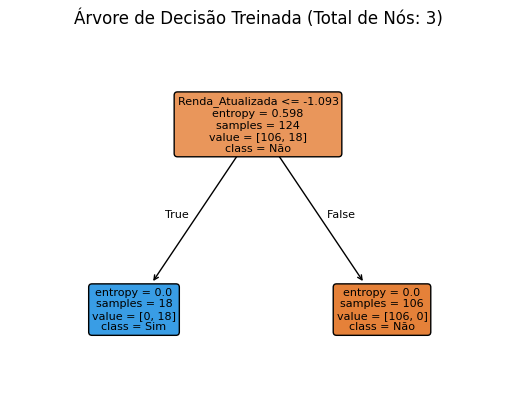

In [228]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

feature_names = X.columns.tolist()

class_names = ['Não', 'Sim']

plot_tree(
    modelo,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,         # Colore os nós pela classe majoritária
    rounded=True,        # Bordas arredondadas
    proportion=False,    # Mostra a contagem exata de amostras (value)
    fontsize=8           # Ajuste a fonte para melhor legibilidade
)

# Título da Visualização
plt.title(f"Árvore de Decisão Treinada (Total de Nós: {modelo.tree_.node_count})")

# Exibir a plotagem
plt.show()

In [229]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

# 1. Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# 2. Avaliar o modelo
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

print("\n--- Matriz de Confusão ---")
print(confusion_matrix(y_test, y_pred))

print(f"\nAcurácia do Modelo: {accuracy_score(y_test, y_pred):.2f}")
print(f"\nÁrea sob a Curva ROC: {roc_auc_score(y_test, y_pred):.2f}")
print(f"\nRecall: {recall_score(y_test, y_pred):.2f}")
print(f"\nPrecisão: {precision_score(y_test, y_pred):.2f}")
print(f"\nF1-Score: {f1_score(y_test, y_pred):.2f}")


--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.88      0.88      0.88         8

    accuracy                           0.96        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.96      0.96      0.96        54


--- Matriz de Confusão ---
[[45  1]
 [ 1  7]]

Acurácia do Modelo: 0.96

Área sob a Curva ROC: 0.93

Recall: 0.88

Precisão: 0.88

F1-Score: 0.88
